#**Basic Pytorch**

**Resources**: https://pytorch.org/tutorials/

## **1. Tensor**

Tensor is a multi-dimensional matrix containing elements of a single data type. They are backed by the accelerator memory like GPU, unlike NumPy arrays.

#### Import pytorch library

In [ ]:
import torch

#### Creating Empty Tensor

In [ ]:
x = torch.empty(4) # vector, 1D
print(x)

tensor([-1.0963e-07,  4.4505e-41, -1.0963e-07,  4.4505e-41])


In [ ]:
x = torch.empty(2,3) # matrix, 2D
print(x)

tensor([[-1.0963e-07,  4.4505e-41,  5.6100e+00],
        [ 3.1318e-41,  4.4842e-44,  0.0000e+00]])


In [ ]:
x = torch.empty(2,2,2,3) # tensor, 4 dimensions
print(x)

tensor([[[[-1.0963e-07,  4.4505e-41, -1.0963e-07],
          [ 4.4505e-41,  4.4842e-44,  0.0000e+00]],

         [[ 8.9683e-44,  0.0000e+00,  1.3760e-07],
          [ 3.1311e-41,  6.2413e+00,  3.1318e-41]]],


        [[[ 1.9618e-44,  1.4074e+14,  6.2414e+00],
          [ 3.1318e-41,  1.5456e-42,  1.0063e+22]],

         [[ 6.2413e+00,  3.1318e-41,  1.9618e-44],
          [ 3.2041e-05,  9.1084e-44,  0.0000e+00]]]])


#### Creating Tensor directly from data



In [ ]:
data = [[1, 2],[3, 4]]
x = torch.tensor(data)
print(x)

tensor([[1, 2],
        [3, 4]])


#### Creating Tensor initialized with Zeros and Ones

In [ ]:
x_0 = torch.zeros(2, 1) # fill with 0
x_0_float = torch.zeros(2, 1, dtype=torch.float16)  # specify types, float32 default
x_1 =torch.ones(5, 3)   # fill with 1

print(x_0)
print(x_0_float)
print(x_1)

tensor([[0.],
        [0.]])
tensor([[0.],
        [0.]], dtype=torch.float16)
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


#### Determining shape and type of Tensor

In [ ]:
# check size
print(x.size())

# check data type
print(x.dtype)
print(x_0.dtype)
print(x_0_float.dtype)

torch.Size([2, 2])
torch.int64
torch.float32
torch.float16


#### requires_grad



In [ ]:
# requires_grad argument
# This will tell pytorch that it will need to calculate the gradients for this tensor
# later in your optimization steps
# i.e. this is a variable in your model that you want to optimize
x = torch.tensor([[5.5, 3], [1.2, 9.1]], requires_grad=True)
print(x)

tensor([[5.5000, 3.0000],
        [1.2000, 9.1000]], requires_grad=True)


###**Operations**

In [ ]:
# Operations
y = torch.rand(2, 2)    # torch.rand(size): random numbers [0, 1]
x = torch.rand(2, 2)

print(x)
print(y)

tensor([[0.1848, 0.0879],
        [0.7372, 0.6731]])
tensor([[0.3538, 0.2431],
        [0.4788, 0.3140]])


#### Elementwise Addition

In [ ]:
# elementwise addition
# z = x + y
z = torch.add(x,y)
print(z)

tensor([[0.5385, 0.3310],
        [1.2161, 0.9871]])


#### Elementwise Subtraction

In [ ]:
# substraction
z = x - y
# z = torch.sub(x, y)

#### Elementwise Multiplication

In [ ]:
# multiplication elementwise ; use @ for matrix mul
z = x @ y
print(z)
# z = torch.mul(x,y)

tensor([[0.1075, 0.0725],
        [0.5831, 0.3906]])


#### Elementwise Division

In [ ]:
# Division
z = x / y
# z = torch.div(x,y)
print(z)

tensor([[0.5222, 0.3617],
        [1.5396, 2.1435]])


#### Inplace operation

In [ ]:
# in place addition, everythin with a trailing underscore is an inplace operation (make changes directly without making a copy)
# i.e. it will modify the variable
y.add_(x)
print(y)
# other operations


tensor([[0.5385, 0.3310],
        [1.2161, 0.9871]])


#### Slicing Tensors

In [ ]:
# Slicing (same as numpy arrays)
x = torch.rand(5, 3)
print(x)

tensor([[0.1482, 0.9413, 0.2012],
        [0.8249, 0.8269, 0.2712],
        [0.9245, 0.0989, 0.5343],
        [0.3550, 0.6953, 0.0056],
        [0.7299, 0.9187, 0.6035]])


In [ ]:
print(x[ : , 2]) # all rows, column 0

tensor([0.2012, 0.2712, 0.5343, 0.0056, 0.6035])


In [ ]:
print(x[1,1]) # element at 1, 1

# # Get the actual value if only 1 element in your tensor
print(x[1,0].item())

tensor(0.8269)
0.8249004483222961


###**Tensor <--> Numpy**

In [ ]:
# Numpy
# Converting a Torch Tensor to a NumPy array and vice versa is very easy
a = torch.ones(5)
print(a)

# torch to numpy with .numpy()
b = a.numpy()
print(b)
print("b: ", type(b) , "a: ", type(a))

c= torch.from_numpy(b)
print("c: ", type(c))

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
b:  <class 'numpy.ndarray'> a:  <class 'torch.Tensor'>
c:  <class 'torch.Tensor'>


In [ ]:
print(a)
print(b)
print("-")
a.add_(1)
print(a)
print(b)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
-
tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


#### To check if CUDA is currently available.

In [ ]:
torch.cuda.is_available()

True

In [ ]:
# by default all tensors are created on the CPU,
# but you can also move them to the GPU (only if it's available )
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    # z = z.numpy() # not possible because numpy cannot handle GPU tenors
    # move to CPU again
    # z.to("cpu")       # ``.to`` can also change dtype together!
    # z = z.numpy()

In [ ]:
z

tensor([[1.1482, 1.9413, 1.2012],
        [1.8249, 1.8269, 1.2712],
        [1.9245, 1.0989, 1.5343],
        [1.3550, 1.6953, 1.0056],
        [1.7299, 1.9187, 1.6035]], device='cuda:0')

In [ ]:
# z.to('cpu')
z = z.cpu().numpy()
print(z)

[[1.1481677 1.9412621 1.2012143]
 [1.8249004 1.8269005 1.2711599]
 [1.924509  1.0989223 1.5342618]
 [1.3550403 1.6953081 1.0055891]
 [1.7298503 1.9187369 1.6034758]]


## **2. Backpropogation via Autograd**

[Tensors, Functions and Computational graph](https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html#tensors-functions-and-computational-graph)

In [ ]:
# Autograd does automatic differentiation on "tensors"
# requires_grad = True -> tracks all operations on the tensor.
x = torch.randn(3, requires_grad=True)
y = x + 2

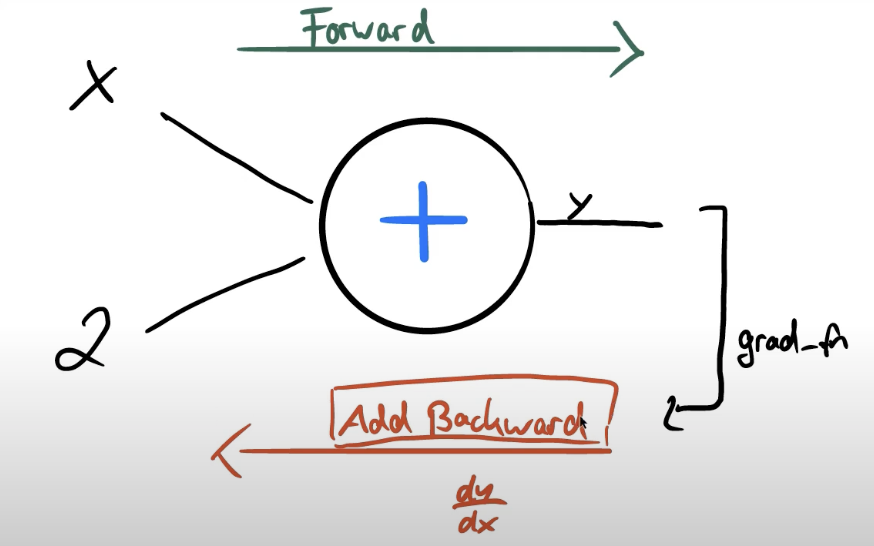

In [ ]:
# y was created as a result of an operation, so it has a grad_fn attribute.
print(x) # created by the user -> grad_fn is None
print(y)

tensor([-0.0946,  1.1633, -0.4682], requires_grad=True)
tensor([1.9054, 3.1633, 1.5318], grad_fn=<AddBackward0>)


In [ ]:
# squaring opertaion
y=x*2
print(y.grad_fn) # y=x+2
print(y)

tensor([-0.1892,  2.3265, -0.9363], grad_fn=<MulBackward0>)


In [ ]:
# Do more operations on y
z = y * y * 3
print(z)
z = z.mean()
print(z)

tensor([ 0.1074, 16.2383,  2.6302], grad_fn=<MulBackward0>)
tensor(6.3253, grad_fn=<MeanBackward0>)


In [ ]:
# Let's compute the gradients with backpropagation
# When we finish our computation we can call .backward() and have all the gradients computed automatically.
# The gradient for this tensor will be accumulated into .grad attribute.
# It is the partial derivate of the function w.r.t. the tensor

# z.backward() #compute gradients with respect to all var
# print(x.grad) # dz/dx

In [ ]:
print(x.grad)

None


In [ ]:
# y.backward()

In [ ]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float32)
y.backward(v, retain_graph=True) # gradient of vector is not allowed, so we convert it into scaler : 0.1*x1+1*x2+0.0001*x3
print(x.grad)

tensor([2.0000e-01, 2.0000e+00, 2.0000e-04])


In [ ]:
# -------------
# Stop a tensor from tracking history:
# For example during our training loop when we want to update our weights
# then this update operation should not be part of the gradient computation
# - x.requires_grad_(False)
# - x.detach()
# - wrap in 'with torch.no_grad():'

# .requires_grad_(...) changes an existing flag in-place.
a = torch.randn(2, 2)
print(a.requires_grad)  #False
b = ((a * 3) / (a - 1))
print(b.grad_fn)  #None


a.requires_grad_(True)
print(a.requires_grad)  #True
b = (a * a).sum()
print(b.requires_grad)  #True
print(b.grad_fn)

False
None
True
True


In [ ]:
# .detach(): get a new Tensor with the same content but no gradient computation:
a = torch.randn(2, 2, requires_grad=True)
print(a.requires_grad)  #True
b = a.detach()
print(b.requires_grad)  #False

True
False


In [ ]:
# wrap in 'with torch.no_grad():'
a = torch.randn(2, 2, requires_grad=True)
print(a.requires_grad)  #True
with torch.no_grad():
    print((a ** 2).requires_grad) #False


True
False


In [ ]:
# -------------
# backward() accumulates the gradient for this tensor into .grad attribute.
# !!! We need to be careful during optimization !!!
# Use .zero_() to empty the gradients before a new optimization step!
weights = torch.ones(4, requires_grad=True)

for epoch in range(1):
    model_output = (weights*3).sum()
    print(model_output)
    model_output.backward() #computes gradient of model_output wrt var(weights)
    print(weights.grad)

    # optimize model, i.e. adjust weights...
    with torch.no_grad():
        weights -= 0.1 * weights.grad

    # this is important! It affects the final weights & output
    weights.grad.zero_()  # ensures that the gradients don't accumulate across multiple iterations.
    print(weights.grad)

print(weights)
print(model_output)

tensor(12., grad_fn=<SumBackward0>)
tensor([3., 3., 3., 3.])
tensor([0., 0., 0., 0.])
tensor([0.7000, 0.7000, 0.7000, 0.7000], requires_grad=True)
tensor(12., grad_fn=<SumBackward0>)


##**4.Integrating [Weights & Biases](https://wandb.ai/site)**

In [ ]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.0 MB/s eta 0:00:00


In [ ]:
#Steps for basic configurations:
#1. wandb login
#2. import wandb
#   wandb.init(project="my-awesome-project")
#3. wandb.log({'accuracy': train_acc, 'loss': train_loss})

In [ ]:
import wandb

##**5. DL Model Training with weights & Biases**

In [ ]:
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable
import torch.nn.functional as F
import wandb

hyperparameter_defaults = dict(
    dropout = 0.5,
    channels_one = 16,
    channels_two = 32,
    batch_size = 100,
    learning_rate = 0.001,
    epochs = 2,
    )

# tell wandb to get started
wandb.init(config=hyperparameter_defaults, project="pytorch-wandb-tutorial", name = "fashion-mnist")

wandb: Currently logged in as: saurabhyd. Use `wandb login --relogin` to force relogin


###**Model Definition**

In [ ]:

# access all HPs through wandb.config
config = wandb.config

#create model class
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()

        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=config.channels_one, kernel_size=5, stride=1, padding=0)
        self.relu1 = nn.ReLU()
        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)

        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=config.channels_one, out_channels=config.channels_two, kernel_size=5, stride=1, padding=0)
        self.relu2 = nn.ReLU()

        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)

        self.dropout = nn.Dropout(p=config.dropout)

        # Fully connected 1 (readout)
        self.fc1 = nn.Linear(config.channels_two*4*4, 10)

    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)

        # Max pool 1
        out = self.maxpool1(out)

        # Convolution 2
        out = self.cnn2(out)
        out = self.relu2(out)

        # Max pool 2
        out = self.maxpool2(out)

        # Resize
        # Original size: (100, 32, 7, 7)
        # out.size(0): 100
        # New out size: (100, 32*7*7)
        out = out.view(out.size(0), -1)
        out = self.dropout(out)
        # Linear function (readout)
        out = self.fc1(out)

        return out


###**Dataloader**
It represents a Python iterable over a dataset.

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torch.autograd import Variable
import torch.nn.functional as F
import os

normalize = transforms.Normalize(mean=[x/255.0 for x in [125.3, 123.0, 113.9]],
                                    std=[x/255.0 for x in [63.0, 62.1, 66.7]])  #change pixel intensity range

transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.1307,), (0.3081,))])

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transform
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transform
)

100%|██████████| 26421880/26421880 [00:02<00:00, 11673820.27it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 193654.32it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3689726.00it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4778109.54it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
from torch.utils.data import random_split

val_size = len(test_data) // 2
test_size = len(test_data) - val_size
test_data, val_data = random_split(test_data, [test_size, val_size])

len(val_data), len(test_data)

(5000, 5000)

In [ ]:

label_names = [
  "T-shirt or top",
  "Trouser",
  "Pullover",
  "Dress",
  "Coat",
  "Sandal",
  "Shirt",
  "Sneaker",
  "Bag",
  "Boot"]

train_loader = torch.utils.data.DataLoader(dataset=training_data,
                                          batch_size=config.batch_size,
                                          shuffle=True)

val_loader = torch.utils.data.DataLoader(dataset=val_data,
                                        batch_size=config.batch_size,
                                        shuffle=False)

test_loader = torch.utils.data.DataLoader(dataset=test_data,
                                        batch_size=config.batch_size,
                                        shuffle=False)

In [ ]:
for X, y in test_loader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([100, 1, 28, 28])
Shape of y: torch.Size([100]) torch.int64


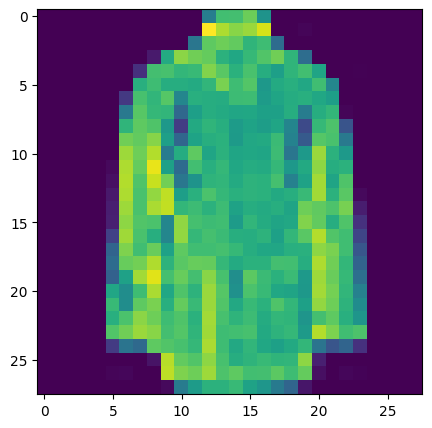

tensor(4)


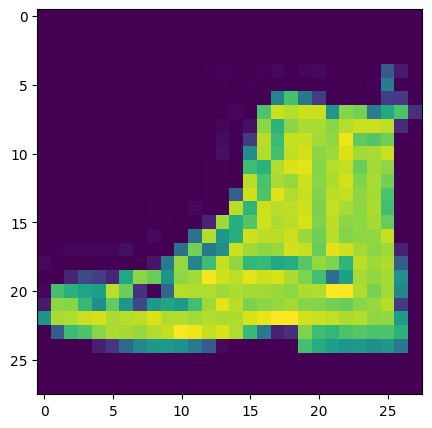

tensor(9)


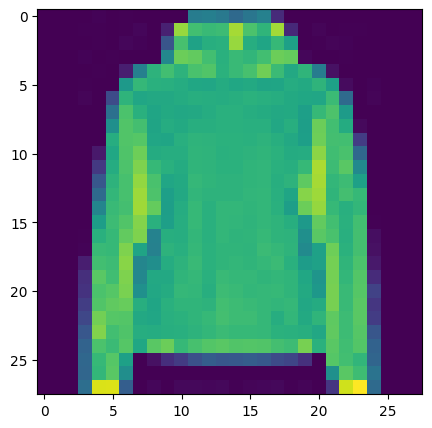

tensor(4)


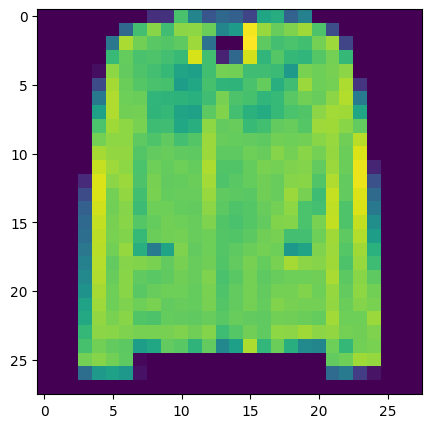

tensor(4)


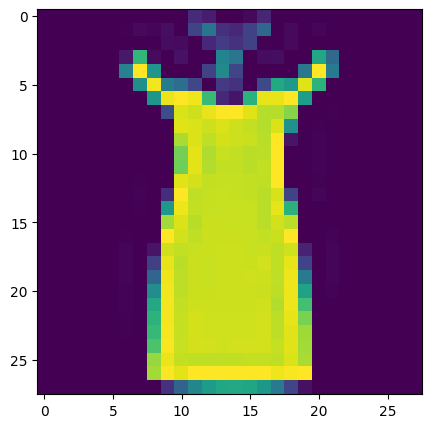

tensor(3)


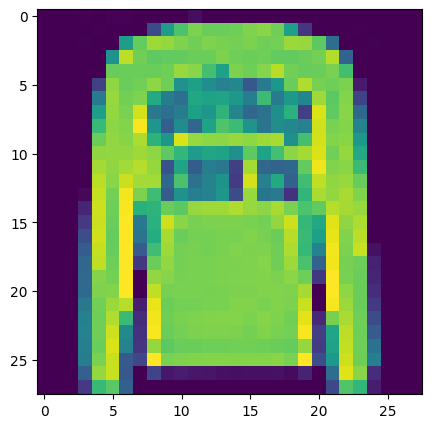

tensor(2)


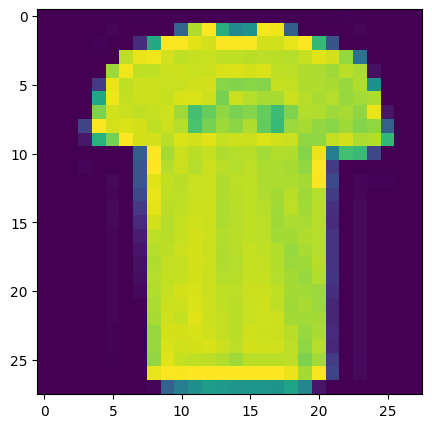

tensor(0)


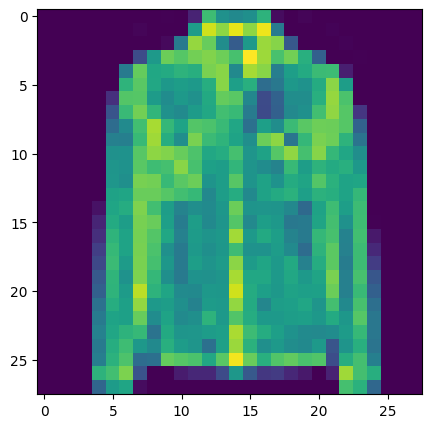

tensor(6)


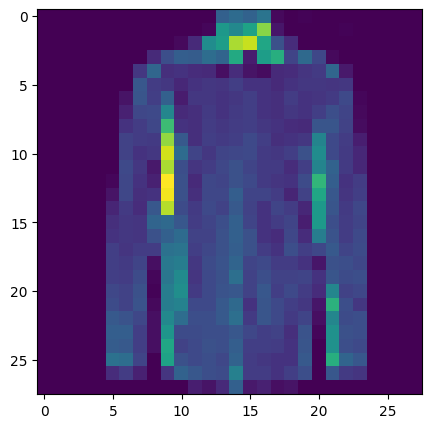

tensor(6)


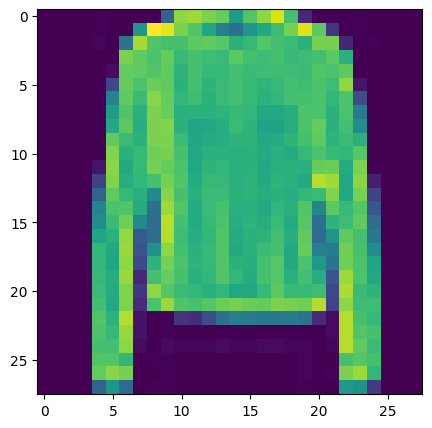

tensor(6)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def show_img(img):
      plt.figure(figsize=(5, 5))
      img = img / 2 + 0.5     # unnormalize
      npimg = img.numpy()
      plt.imshow(np.transpose(npimg, (1, 2, 0)))
      plt.show()

for i, (images, labels) in enumerate(train_loader):

  for i in range(10):
    show_img(images[i])
    print(labels[i])
  break

###**Train**

In [ ]:
model = CNNModel()
#track gradients
# wandb.watch(model)
#loss
criterion = nn.CrossEntropyLoss()
# Tell wandb to watch what the model gets up to: gradients, weights, and more!
wandb.watch(model, criterion, log="all", log_freq=10)

#optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=config.learning_rate)

iter = 0

In [ ]:
total_loss_train = []
total_loss_validation = []

for epoch in range(config.epochs):
  batch_loss_train=0
  batch_loss_val=0
  num_batches = 0
  for i, (images, labels) in enumerate(train_loader):

      # Clear gradients w.r.t. parameters
      optimizer.zero_grad()

      # Forward pass to get output/logits
      outputs = model(images)

      # Calculate Loss: softmax --> cross entropy loss
      loss = criterion(outputs, labels)

      # Getting gradients w.r.t. parameters
      loss.backward()

      # Updating parameters
      optimizer.step()

      batch_loss_train+=loss.item()

      iter += 1
      num_batches+=1

      if iter % 100 == 0:
          # Calculate Accuracy
          correct = 0.0
          correct_arr = [0.0] * 10
          total = 0.0
          total_arr = [0.0] * 10

          # Iterate through test dataset
          for images, labels in test_loader:

              # Forward pass only to get logits/output
              outputs = model(images)

              # Get predictions from the maximum value
              _, predicted = torch.max(outputs.data, 1)

              # Total number of labels
              total += labels.size(0)
              correct += (predicted == labels).sum()
              loss_test = criterion(outputs, labels)
              for label in range(10):
                  correct_arr[label] += (((predicted == labels) & (labels==label)).sum())
                  total_arr[label] += (labels == label).sum()

          accuracy = correct / total

          metrics = {'accuracy': accuracy, 'loss_train': loss, 'loss_test': loss_test}
          for label in range(10):
              metrics['Accuracy ' + label_names[label]] = correct_arr[label] / total_arr[label]   #tells wand to log the metrics defined earlier
          wandb.log(metrics)

          # Print Loss
          print('Iteration: {0} Loss_train: {1:.2f} Loss_test: {1:.2f} Accuracy: {2:.2f}'.format(iter, loss,loss_test, accuracy))

  batch_loss_train/=num_batches
  total_loss_train.append(batch_loss_train)

  correct = 0
  total = 0
  count = 0
  with torch.no_grad():

    for data in val_loader:
        # print("s")
        images, labels = data
        outputs = model(images)
        total += labels.size(0)
        # os.cpu_count+=1
        loss_val = criterion(outputs, labels)

        batch_loss_val += loss_val.item()
        outputs = [1 if x>0.5 else 0 for x in outputs]
        outputs = torch.Tensor(outputs)

        correct += (outputs == labels).sum().item()
    total_loss_validation += [batch_loss_val/count]
    print("Validation loss is ",batch_loss_val/count)

torch.save(model.state_dict(), os.path.join(wandb.run.dir, "model.pt"))



Iteration: 1300 Loss_train: 0.29 Loss_test: 0.29 Accuracy: 0.38
Iteration: 1400 Loss_train: 0.37 Loss_test: 0.37 Accuracy: 0.33
Iteration: 1500 Loss_train: 0.40 Loss_test: 0.40 Accuracy: 0.36
Iteration: 1600 Loss_train: 0.61 Loss_test: 0.61 Accuracy: 0.37
Iteration: 1700 Loss_train: 0.46 Loss_test: 0.46 Accuracy: 0.36
Iteration: 1800 Loss_train: 0.32 Loss_test: 0.32 Accuracy: 0.35


RuntimeError: Boolean value of Tensor with more than one value is ambiguous